### Fourier Transofrm and the Gibbs Phenomenon

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.piecewise(x, [np.logical_and(0 < x, x < 0.5), np.logical_and(0.5 <= x, x < 1)], [1, 0])

def fourier_sine_series(x, n_terms):
    result = 0
    for n in range(1, n_terms + 1):
        result += (2 / (n * np.pi)) * np.sin(n * np.pi * x)
    return result

def fourier_cosine_series(x, n_terms):
    result = 0.5  # DC component
    for n in range(1, n_terms + 1):
        result += np.cos(2 * n * np.pi * x) / (2 * n)
    return result

def gibbs_phenomenon(x, n_terms):
    original_function = f(x)
    sine_series = fourier_sine_series(x, n_terms)
    cosine_series = fourier_cosine_series(x, n_terms)
    total_series = sine_series + cosine_series

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.plot(x, original_function, label='Original Function')
    plt.title('Original Function')

    plt.subplot(2, 2, 2)
    plt.plot(x, sine_series, label=f'Fourier Sine Series (terms={n_terms})')
    plt.title('Fourier Sine Series')

    plt.subplot(2, 2, 3)
    plt.plot(x, cosine_series, label=f'Fourier Cosine Series (terms={n_terms})')
    plt.title('Fourier Cosine Series')

    plt.subplot(2, 2, 4)
    plt.plot(x, total_series, label=f'Total Fourier Series (terms={n_terms})')
    plt.title('Total Fourier Series')

    plt.tight_layout()
    plt.show()

# Calculate Gibbs phenomenon for several terms
x_values = np.linspace(0, 1, 1000)
for n_terms in [5, 10, 20]:
    gibbs_phenomenon(x_values, n_terms)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.piecewise(x, [np.logical_and(0 < x, x < 0.5), np.logical_and(0.5 <= x, x < 1)], [1, 0])

def fourier_sine_series(x, n_terms):
    result = 0
    for n in range(1, n_terms + 1):
        result += (2/(n*np.pi))*np.sin(n*np.pi* x)
    return result

def fourier_cosine_series(x, n_terms):
    result = 0.5  # DC component
    for n in range(1, n_terms + 1):
        result += np.cos(2 * n * np.pi * x) / (2 * n)
    return result

def gibbs_phenomenon(x, n_terms):
    original_function = f(x)
    sine_series = fourier_sine_series(x, n_terms)
    cosine_series = fourier_cosine_series(x, n_terms)
    total_series = sine_series + cosine_series

    plt.figure(figsize=(10, 6))

    plt.plot(x, original_function, label='Original Function', linewidth=2)
    plt.plot(x, sine_series, label=f'Fourier Sine Series (terms={n_terms})', linestyle='--')
    plt.plot(x, cosine_series, label=f'Fourier Cosine Series (terms={n_terms})', linestyle='--')
    plt.plot(x, total_series, label=f'Total Fourier Series (terms={n_terms})', linestyle='--')

    plt.title(f'Gibbs Phenomenon - {n_terms} Terms')
    plt.xlabel('x')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate Gibbs phenomenon for several terms
x_values = np.linspace(0, 1, 1000)
for n_terms in [100, 100, 100]:
    gibbs_phenomenon(x_values, n_terms)


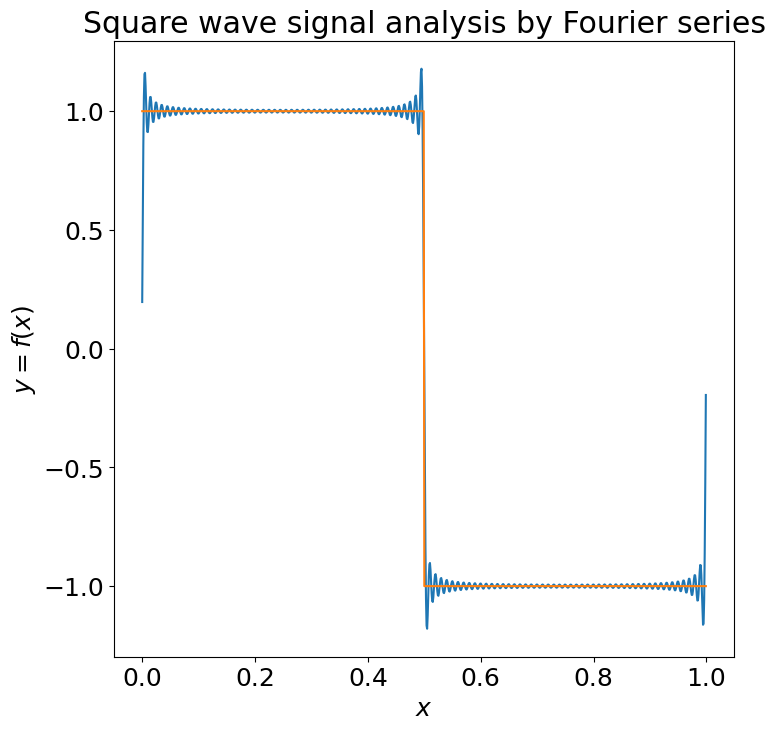

In [18]:
import numpy as np 
from scipy.signal import square
import matplotlib.pyplot as plt 
from scipy.integrate import simps

L=1
freq=1
dutycycle=0.5
samples=1000
terms=100

x=np.linspace(0,L,samples,endpoint=False)
y=square(2.0*np.pi*x*freq/L,duty=dutycycle)

a0 = 2./L*simps(y,x)
an=lambda n:2.0/L*simps(y*np.cos(2.*np.pi*n*x/L),x)
bn=lambda n:2.0/L*simps(y*np.sin(2.*np.pi*n*x/L),x)

s=a0/2.+sum([an(k)*np.cos(2.*np.pi*k*x/L)+bn(k)*np.sin(2.0*np.pi*k*x/L) for k in range(1,terms+1)])

plt.plot(x,s)
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
#plt.legend(loc='best',prop={'size':10})
plt.title('Square wave signal analysis by Fourier series')
plt.show()

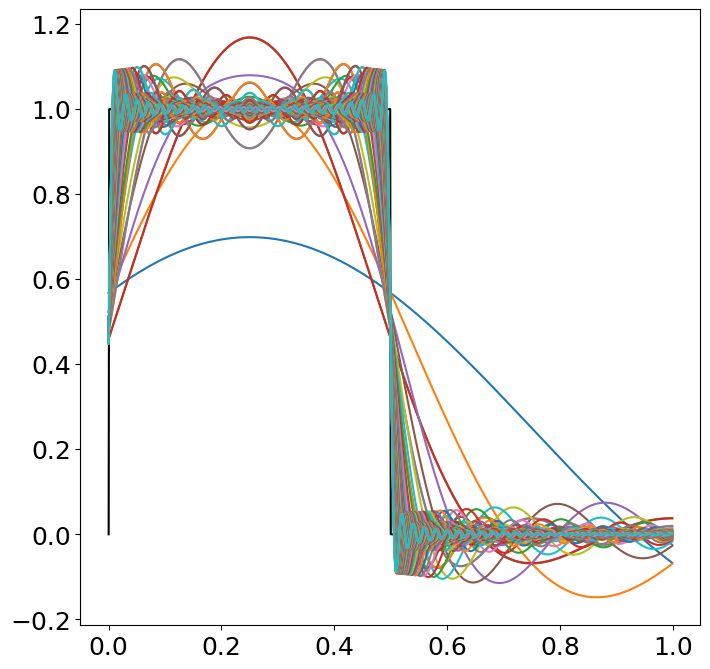

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap 

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})

# define domain 
dx = 0.001
L = 1
x = np.arange(0,1,dx)
#n = len(x)
#nquart = int(np.floor(n))

# define function 
f = np.piecewise(x, 
                 [np.logical_and(0 < x, x < 0.5), 
                  np.logical_and(0.5 <= x, x < 1)], 
                 [1, 0])

fig, ax = plt.subplots()
ax.plot(x,f,'-',color='k')

# Compute Fourier series
name = 'Accent'
cmap = plt.colormaps.get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f*np.ones_like(x))*dx
fFS = A0/2

m = 100  

A = np.zeros(m)
B = np.zeros(m)
for k in range(m):
    A[k] = np.sum(f*np.cos(np.pi*(k+1)*x/L))*dx 
    B[k] = np.sum(f*np.sin(np.pi*(k+1)*x/L))*dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    ax.plot(x,fFS,'-')

### Fast Fourier Tranform

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Function to plot FFT and interpret the results
def plot_fft(signal, sampling_freq, title):
    # Calculate the FFT
    n = len(signal)
    frequencies = fftfreq(n, d=1/sampling_freq)
    fft_values = fft(signal)

    # Plot the original signal
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(np.arange(0, n)/sampling_freq, signal)
    plt.title(f'Original {title} Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the FFT
    plt.subplot(2, 1, 2)
    plt.stem(frequencies, np.abs(fft_values))
    plt.title(f'FFT of {title} Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, sampling_freq/2)

    plt.tight_layout()
    plt.show()

# Example 1: Multiple frequencies wave
sampling_freq_1 = 1000
t_1 = np.arange(0, 1, 1/sampling_freq_1)
signal_1 = 0.7 * np.sin(2 * np.pi * 50 * t_1) + np.sin(2 * np.pi * 120 * t_1)
plot_fft(signal_1, sampling_freq_1, 'Multiple Frequencies')

# Example 2: Square wave
sampling_freq_2 = 500
t_2 = np.arange(0, 1, 1/sampling_freq_2)
signal_2 = np.sign(np.sin(2 * np.pi * 5 * t_2))
plot_fft(signal_2, sampling_freq_2, 'Square')

# Example 3: Triangular wave
sampling_freq_3 = 200
t_3 = np.arange(0, 1, 1/sampling_freq_3)
signal_3 = np.abs(np.mod(t_3, 1) - 0.5) * 2 - 1
plot_fft(signal_3, sampling_freq_3, 'Triangular')
